# Поиск аномалий во временных рядах на примере детектирования поломок оборудования

## 1. Теория о задаче поиска аномалий во временных рядах

### 1.1 Основные термины и постановка задачи

**Временные ряды** - это одномерные или многомерные данные, наблюдаемые во времени в последовательном порядке. В особом случае данные наблюдают через заранее определенные и равноотстоящие промежутки времени (например, ежегодно, ежемесячно, ежеквартально или ежечасно)

![Screenshot 2023-06-28 at 22.58.05.png](attachment:83f4ce46-bd05-42f8-b694-dbd0233f3e96.png)

**Поиск аномалий** - это задача обнаружить необычное поведение временного ряда, или несвойственное поведение для процесса. Наглядно примеры аномалий представлены на картинке:

![Screenshot 2023-06-28 at 22.59.39.png](attachment:51982ede-e940-409f-ada0-3ed695392b6a.png)

### 1.2 Классификация аномалий

В зависимости от разных характеристик, аномалии могут выражаться и называться по-разному. Классификация аномалий в зависимости от типов данных, доменной области и количества точек представлена на рисунке ниже:

![Screenshot 2023-06-28 at 23.02.42.png](attachment:759c9c24-b6ac-4919-a28e-56d390c06f22.png)

### 1.3 Типы аномалий в зависимости от количества точек

Во временных рядах (и других последовательностях) бывает важно искать не отдельные выбросы, а целые группы последовательных аномальных точек, которые могут представлять собой изменение поведение объекта и тд. При этом, по количеству точек аномалии классифицируют на точечные (point), коллективные (collective) ([Chandola, 2009](https://conservancy.umn.edu/bitstream/handle/11299/215731/07-017.pdf?sequence=1)):
- Точечная аномалия - это аномалия, возникающая в виде отдельной точки, считающейся аномальной по отношению к остальной части данных.
- Коллективная аномалия — это аномалия, возникающая в виде последовательности временных точек, когда между началом и концом аномалии не существует неаномальных (нормальных) данных.
В таком случае именно точечные аномалии можно называть выбросами (outliers), так как согласно Aggarwal, 2016 выбросы - это индивидуальные точки, отличающиеся от остальных данных (=точечные аномалии). Существуют также контекстуальные (contextual) аномалии, но к этому типу могут относиться как точечные, так и коллективные аномалии, если аномальность точек заметна только в контексте (данных поблизости).

### 1.4 Формулировки задач

В зависимости от типов аномалий могут формулироваться различные математические задачи. Это важно, потому что для решения этих задач могут использоваться совсем разные подходы. Задачи в зависимости от типов аномалий бывают следующие:
- Точечные аномалии (выбросы). При решении задачи детекции точечных аномалий мы будем формулировать задачу отнесения каждой точки к нормальному или аномальному классу, то есть задачу бинарной классификации. Но задача не всегда supervised, тогда ее называют и задачей поиска выбросов (outlier detection), и кластеризацией, и одноклассовой классификацией.
- Коллективные аномалии. Для коллективных аномалий мы чаще всего формулируем задачу обнаружения точки изменения состояния (сhangepoint detection). Подробно задача changepoint detection на python разобрана в [этом докладе](https://pycon.ru/poisk-tochek-izmeneniya-sostoyaniya-changepoint-detection-na-python). Однако, в зависимости от постановки бизнес-задачи и прочих условий, мы можем интерпретировать коллективную аномалию как набор точечных аномалий (пусть и последовательных), и тогда ставится задача бинарной классификации.
Другими словами, алгоритмы обнаружения точки изменения состояния применимы только для коллективных аномалий, потому что необходимо найти конкретную точку изменения состояния (change point), где эта коллективная аномалия начинается (или заканчивается). При этом алгоритмы бинарной классификации (кластеризации, поиска выбросов и тд) применимы для обоих типов аномалий, потому что мы можем представлять коллективную аномалию как набор точечных аномалий.

![Screenshot 2023-06-28 at 22.58.38.png](attachment:b42541df-ce4d-47b6-84e1-6d5b3969c063.png)

Кстати, подробно про метрики оценки качества решения задач поиска аномалий можно прочитать в [этой статье](https://habr.com/ru/companies/rosatom/articles/687270/).

### 1.5 Библиотеки для решения задач поиска аномалий

Довольно подробная и классификация методов решения задачи поиска аномалий в общем случае представлена в уже упомянутой статье ([Chandola, 2009](https://conservancy.umn.edu/bitstream/handle/11299/215731/07-017.pdf?sequence=1)). Нам же больше интересно, какие инструменты есть для решения различных постановок задач поиска аномалий (с фокусом на временных рядах):
- (Задача поиска выбросов) Библиотека PyOD GitHub-репозиторий. Библиотека помогает обнаружить в данных точечные аномалии или выбросы. В библиотеки реализовано более 30 алгоритмов, начиная с классических алгоритмов типа Isolation Forest и заканчивая недавно представленными в научных статьях методами, типа COPOD и другие.
- (Задача онлайн поиск точек изменения состояния) Библиотека Prophet https://github.com/facebook/prophet. Библиотека прославилась решением задачи прогнозирования временных рядов, но позже появилась возможность решать задачу поиска аномалий.
- (Задача оффлайн поиска точек изменения состояния) Библиотека Ruptures https://github.com/deepcharles/ruptures . В библиотеке реализованы основные методы, решающие задачу и описанные в фундаментальной обзорной статье Truong, 2020 [PDF] arxiv.org.
Упоминания достойны еще несколько репозиториев:
- Библиотека Kats https://github.com/facebookresearch/Kats
- Библиотека Merlion https://github.com/salesforce/Merlion
- Библиотека Alibi Detect https://github.com/SeldonIO/alibi-detect
- Бенчмарк NAB https://github.com/numenta/NAB

### 1.6 Методы поиска аномалий

Методов и алгоритмов поиска аномалий существует большое количество. Подробнее о разных классах и алгоритмах можно почитать в научных обзорах, например, в этом:
```
Schmidl, Sebastian, Phillip Wenig, and Thorsten Papenbrock. "Anomaly detection in time series: a comprehensive evaluation." Proceedings of the VLDB Endowment 15.9 (2022): 1779-1797.
```

## 2. Исходные данные и задача

### 2.1 Описание установки

Стенд представляет собой водяной насос с замкнутым контуром, системой электропитания, системами управления, сбора данных и мониторинга, построенных с применением технологий промышленного интернета вещей.
Стенд состоит из следующих систем:

1. Система циркуляции воды.
2. Система управления системой циркуляции воды.
3. Система мониторинга состояния системы циркуляции воды.
4. Система демонстрации технологии Time-Sensitive Networking (TSN).
5. Система сбора, обработки и визуализации данных.

Система циркуляции воды предназначена для имитации системы водоснабжения в лабораторных условиях и обеспечивает циркуляцию воды по водяным трубам путем использования водяного насоса.
Система циркуляции воды обеспечивает имитацию следующих неполадок:

- Введение дисбаланса на соединительном вале мотора и водяного насоса.
- Изменение пропускной способности клапана на входе насоса.
- Изменение пропускной способности клапана на выходе насоса.

In [ ]:
# from IPython.display import Image
# Image(filename="./testbed.png", width=800, height=400)

**Передняя панель и состав систем циркуляции воды, мониторинга, контроля и управления:**

1 - водяной бак; 2 - водяной насос; 3 - электродвигатель; 4 - клапаны; 5 - механический рычаг для обеспечения несоосности валов; 6 - кнопка аварийной остановки.

**Датчики:**

7 - датчик расхода (NI 9401 8-channel); 8 - датчик давления (NI 9203 8-channel); 9, 10 - вибродатчики (NI 9232 3-channel); 11, 12 - термопары (NI 9213 Spring Terminal 16-channel thermocouple).

### 2.2 Описание датасета

**О датасете**

Датасет, с которым мы будем работать, называется *SKAB teaser*.

**Информация**

В данных есть временная отметка записи сигналов:
- datetime - Represents dates and times of the moment when the value is written to the database (YYYY-MM-DD hh:mm:ss)

Данные содержат записи 8ми сигналов с установки:
- Accelerometer1RMS - Shows an absolute vibration acceleration (Amount of g units)
- Accelerometer2RMS - Shows an absolute vibration acceleration (Amount of g units)
- Current - Shows the amperage on the electric motor (Ampere)
- Pressure - Represents the pressure in the loop after the water pump (Bar)
- Temperature - Shows the temperature of the engine body (Degree Celsius)
- Thermocouple - Represents the temperature of the fluid in the circulation loop (Degree Celsius)
- Voltage - Shows the voltage on the electric motor (Volt)
- RateRMS - Represents the circulation flow rate of the fluid inside the loop (Liter per minute)

В данных присутствуют 4 аномалии:  
- РАСЦЕНТРОВКА ВАЛОВ НАСОСА И ДВИГАТЕЛЯ (резко)  
Резкое появление дефекта: 18:39:22  
Резкое отключение дефекта: 18:42:32
- РАСЦЕНТРОВКА ВАЛОВ НАСОСА И ДВИГАТЕЛЯ (медленно)  
Медленное появление дефекта: 18:44:36-18:45:49  
Резкое отключение дефекта: 18:46:51
- ПЕРЕКРЫТИЕ (УМЕНЬШЕНИЕ) ПРОХОДНОГО СЕЧЕНИЯ-1 (верх)  
Медленное появление дефекта: 19:06:57-19:07:37  
Медленное отключение дефекта: 19:10:45-19:11:31
- ПЕРЕКРЫТИЕ (УМЕНЬШЕНИЕ) ПРОХОДНОГО СЕЧЕНИЯ-2 (низ)  
Медленное появление дефекта: 19:14:40-19:16:24  
Медленное отключение дефекта: 19:19:15-19:21:16

### 2.3 Постановка задачи

- **ДС задача с точки зрения бизнеса:** Необходимо обнаруживать возникающие аномалии как можно раньше с момента их появления.

Метрика:
Среднее время запаздывания обнаружения

$\text{ADD} = \frac{1}{|Y|}\sum_{y \in Y} ( \tau_y - \theta_y )$,

где $|Y|$ - суммарное количество точек изменения состояния,  
$\tau_y$ - время обнаружения  
$\theta_y$ - время реального изменения состояния

- **ДС задача с точки зрения математики:** Необходимо построить модель, которая наиболее точно описывает нормальный режим работы установки.

Метрика:
Средняя абсолютная ошибка

$\text{MAE} = \frac{1}{N} \sum^{N}_{i=1}|x_i - \hat{x}_i|$,

где $N$ - общее число значений,  
$x_i$ - правдивое значение в момент времени $i$,  
$\hat{x}_i$ - предсказанное значение в момент времени $i$.

### 2.4 Алгоритм для реализации

Мы будем реализовывать популярный алгоритм *поиска разладки* или *генерации невязки* или *определения расхождения сигналов*. Алгоритм заключается в следующем:
1. Сначала мы строим модель нормального режима работы оборудования (обучение)
2. Потом мы генерируем прогнозы модели (инференс)
3. Потом мы находим разности между прогнозом и реальным значением в каждой точке (эти разности и называют невязкой, разладкой или расхождением)
4. Наконец, мы делаем из разностей один сигнал - индекс или индикатор технического состояния (ИТС)
5. Подбираем для ИТС контрольный предел (UCL) по обучающей или валидационной выборке (главное - на нормальном режиме работы)
6. Сравниваем ИТС в каждой точке с UCL и сигнализируем о нормальном или аномальном состоянии

## 3. Работа с данными

### Импорт необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Загрузка данных

In [ ]:
# Считывание данных из исходного csv файла
raw_data = pd.read_csv('./SKABteaser.csv',
                   sep=';',
                   index_col='datetime',
                   parse_dates=True).drop('index',axis=1)

In [ ]:
# Отображение 10 первых строк таблицы
raw_data.head(10)

,id,value
datetime,,
2019-07-08 17:02:14,Current,0.000749
2019-07-08 17:02:14,Temperature,28.209900
2019-07-08 17:02:14,Voltage,252.743000
2019-07-08 17:02:14,Accelerometer1RMS,0.042830
2019-07-08 17:02:14,Accelerometer2RMS,0.080612
2019-07-08 17:02:14,Volume Flow RateRMS,37.024200
2019-07-08 17:02:14,Pressure,-0.273216
2019-07-08 17:02:14,Thermocouple,23.445700
2019-07-08 17:02:32,Current,0.000849


Необходимо развернуть таблицу, чтобы каждый сигнал являлся колонкой таблицы.

In [ ]:
# Разворачиваем таблицу, приведение к нормальному виду
raw_data = raw_data.pivot_table(values='value', index=raw_data.index, columns='id')

Первые 5 строк таблицы после трансформации выглядят следующим образом:

In [ ]:
# Отображение 5 первых строк таблицы
raw_data.head()

id,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
datetime,,,,,,,,
2019-07-08 17:02:14,0.042830,0.080612,0.000749,-0.273216,28.2099,23.4457,252.743,37.0242
2019-07-08 17:02:32,0.043330,0.084116,0.000849,0.054711,28.3486,23.4492,240.488,37.0000
2019-07-08 17:02:45,0.044111,0.082577,0.000764,0.054711,28.6534,23.4417,235.642,37.9764
2019-07-08 17:02:46,0.044244,0.079906,0.000914,-0.273216,28.8157,23.4417,229.536,37.0242
2019-07-08 17:02:47,0.042298,0.081938,0.000768,0.054711,28.3558,23.4362,239.926,37.9764


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6405 entries, 2019-07-08 17:02:14 to 2019-07-08 19:21:51
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Accelerometer1RMS    6405 non-null   float64
 1   Accelerometer2RMS    6405 non-null   float64
 2   Current              6405 non-null   float64
 3   Pressure             6405 non-null   float64
 4   Temperature          6405 non-null   float64
 5   Thermocouple         6405 non-null   float64
 6   Voltage              6405 non-null   float64
 7   Volume Flow RateRMS  6405 non-null   float64
dtypes: float64(8)
memory usage: 450.4 KB


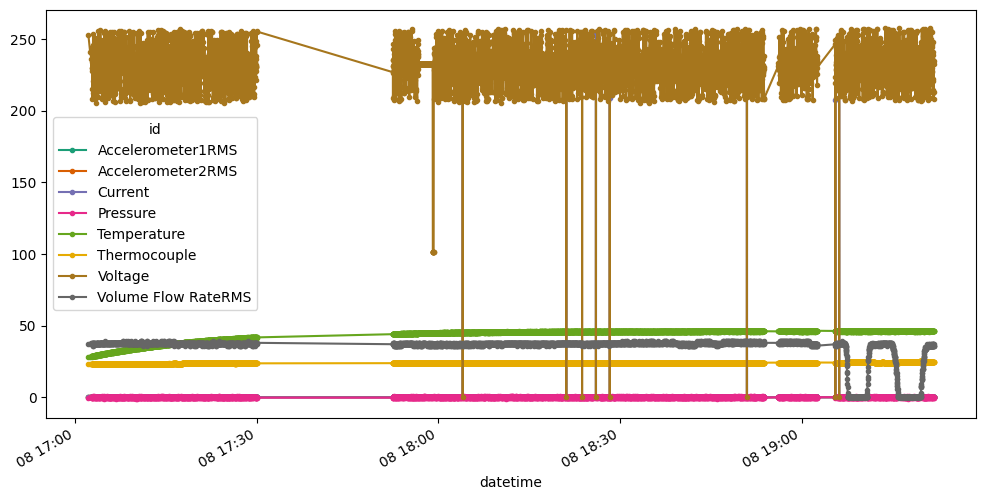

In [ ]:
# Отрисовка графика
raw_data.plot(figsize=(12,6), marker='o', markersize=3, cmap='Dark2');

Обрежем начало данных, чтобы исключить переходный период (разогрев).

In [ ]:
# Обрезка данных
raw_data = raw_data['2019-07-08 17:52:29':]

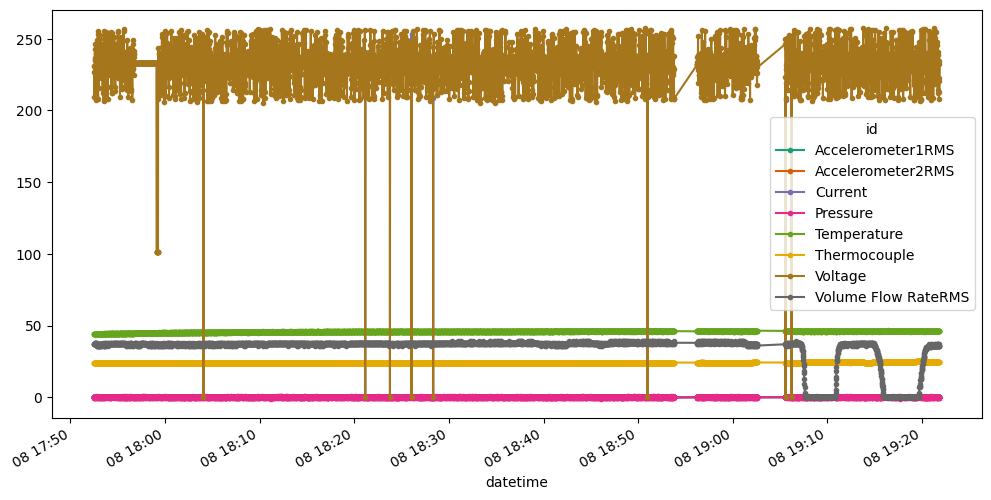

In [ ]:
# Отрисовка графика
raw_data.plot(figsize=(12,6), marker='o', markersize=3, cmap='Dark2');

In [ ]:
# Сохранение предобработанных данных
# raw_data.to_csv('raw_data.csv')

In [ ]:
# Принт размерности данных
print(f'Размерность данных следующая: {raw_data.shape}')

Размерность данных следующая: (4838, 8)


### Значения признаков

In [ ]:
raw_data.describe()

id,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
count,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000
mean,0.039935,0.067975,0.327774,0.036139,45.763933,24.080946,231.892940,33.889386
std,0.014497,0.017103,8.610388,0.256636,0.511680,0.207689,15.404728,10.661003
min,0.032501,0.052414,0.000215,-1.257000,43.897900,23.725900,0.000643,0.000000
25%,0.035849,0.061865,0.000706,0.054711,45.571925,23.948725,227.946250,37.000000
50%,0.036491,0.064238,0.000788,0.054711,45.914550,24.047900,232.797000,37.030400
75%,0.037184,0.066483,0.000860,0.054711,46.105350,24.161475,237.741250,37.992900
max,0.106967,0.148090,253.297000,1.038490,46.591500,25.032200,257.429000,38.969900


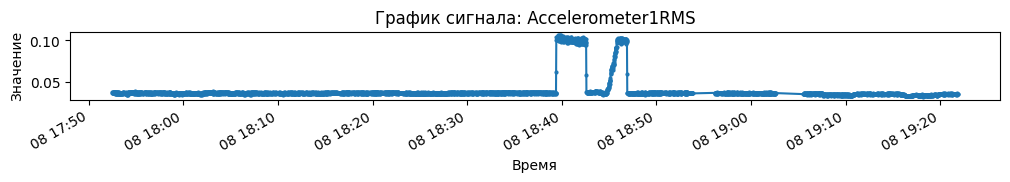

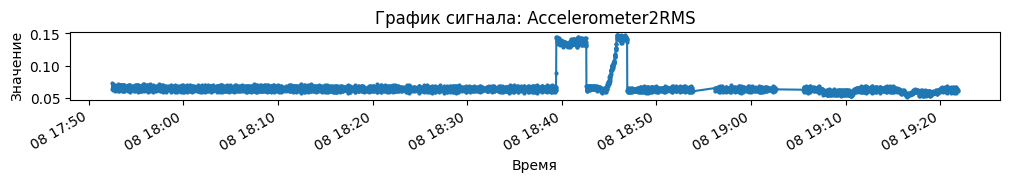

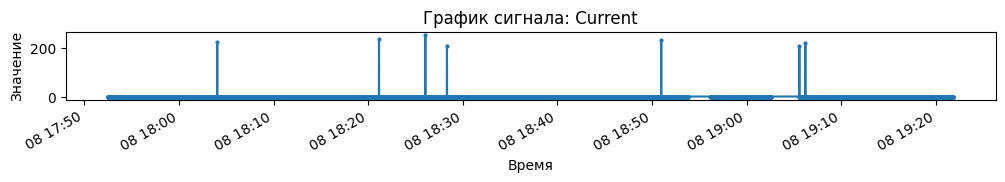

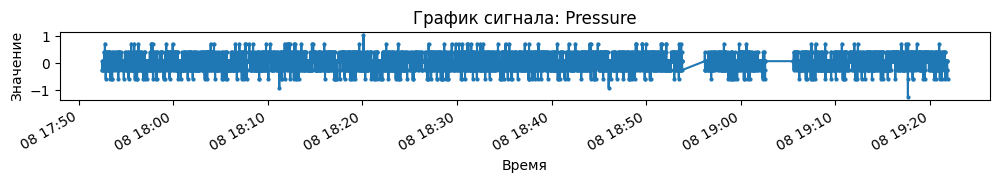

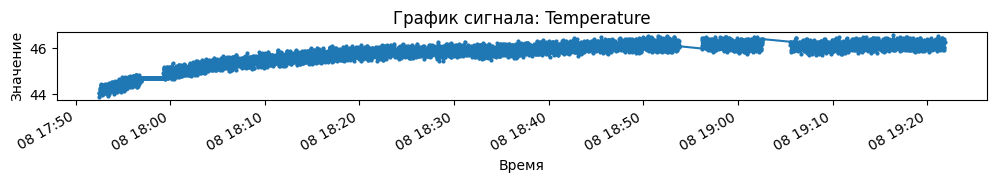

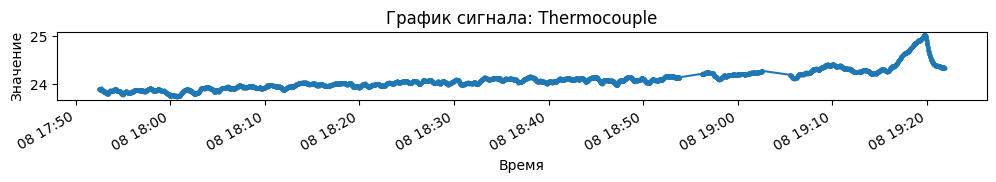

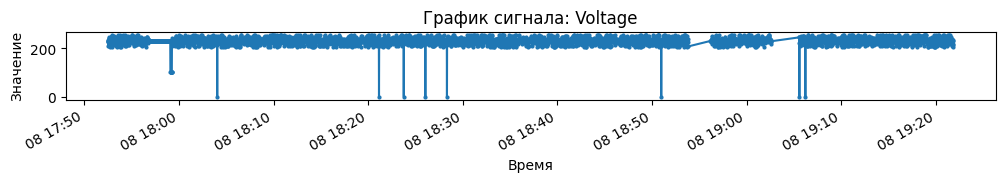

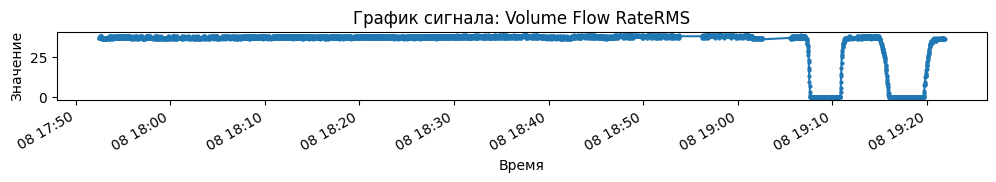

In [ ]:
# Отрисовка графиков всех сигналов
for name in raw_data.columns:
    raw_data[name].plot(figsize=(12,1), marker='o', markersize=2)
    plt.xlabel('Время')
    plt.ylabel('Значение')
    plt.title(f'График сигнала: {name}')
    plt.show()

### Дополнительная обработка данных

In [ ]:
# todo
def preprocessing(raw_data):
    data = raw_data.copy()

    # your code

    return data

data = preprocessing(raw_data=raw_data)

### Разбиение на обучающую, валидационную и тестовую выборки

- Обучающая выборка (training sample) — выборка, по которой производится настройка (оптимизация параметров) модели зависимости.
- Валидационная выборка (validation sample) — выборка, по которой осуществляется выбор наилучшей модели из множества моделей, построенных по обучающей выборке.
- Тестовая (или контрольная) выборка (test sample) — выборка, по которой оценивается качество решения задачи.

Описания и варианты определений обучающей, валидационной и тестовой выборок представлены в [статье 1](http://www.machinelearning.ru/wiki/index.php?title=Выборка), [статье 2](https://medium.com/@tekaround/train-validation-test-set-in-machine-learning-how-to-understand-6cdd98d4a764) и др.

[Статья](https://hunch.net/?p=22) о переобучении в машинном обучении.

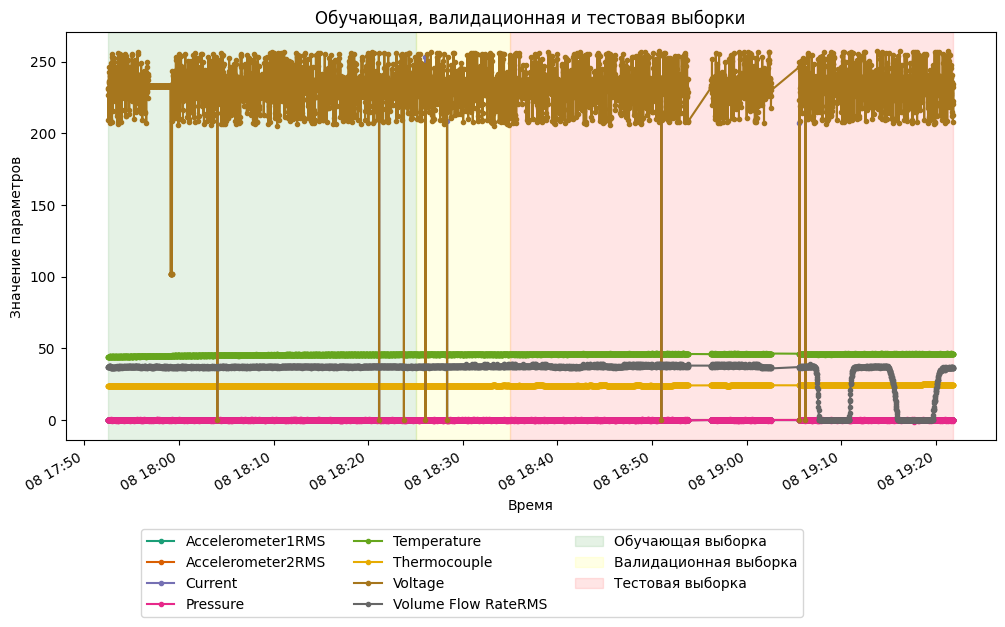

In [ ]:
# Демонстрация разбиения на обучающую, валидационную и тестовую выборки
data.plot(figsize=(12,6), marker='o', markersize=3, cmap='Dark2')
plt.axvspan(data.index[0],
            '2019-07-08 18:25',
            color='green',
            alpha=0.1,
            label='Обучающая выборка')
plt.axvspan('2019-07-08 18:25',
            '2019-07-08 18:35',
            color='yellow',
            alpha=0.1,
            label='Валидационная выборка')
plt.axvspan('2019-07-08 18:35',
            data.index[-1],
            color='red',
            alpha=0.1,
            label='Тестовая выборка')
plt.legend(bbox_to_anchor =(0.8, -0.2), ncol = 3)
plt.xlabel('Время')
plt.ylabel('Значение параметров')
plt.title('Обучающая, валидационная и тестовая выборки');

### Масштабирование (нормализация) данных

Для большинства алгоритмов машинного обучения необходимо, чтобы все признаки были в одном масштабе.

In [ ]:
# Инициализация скэйлера
StSc = StandardScaler()
# Обучение скэйлера на тренировочной выборке
StSc.fit(data[:'2019-07-08 18:25'])

# Применение скэйлера на всех данных
# Преобразование тренировочной выборки
train_sc = StSc.transform(data[:'2019-07-08 18:25'])
# Преобразование валидационной выборки
val_sc = StSc.transform(data['2019-07-08 18:25':'2019-07-08 18:35'])
# Преобразование всей выборки
data_sc = StSc.transform(data)

## 4. Обучение модели нормального режима работы

- Ссылка на курс Keras с бэкэндом TensorFlow: https://youtu.be/qFJeN9V1ZsI

### Импорт необходимых библиотек

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import mean_absolute_error, mean_squared_error
# from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping

from itertools import product

### Функция для воспроизводимости результатов

In [ ]:
def Random(seed_value):
    # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
    import os
    os.environ['PYTHONHASHSEED'] = str(seed_value)

    # 2. Set `python` built-in pseudo-random generator at a fixed value
    import random
    random.seed(seed_value)

    # 3. Set `numpy` pseudo-random generator at a fixed value
    import numpy as np
    np.random.seed(seed_value)

    # 4. Set `tensorflow` pseudo-random generator at a fixed value
    import tensorflow as tf
    tf.random.set_seed(seed_value)

### Описание Автоэнкодера

**Автоэнкодер (автокодировщик)** - нейронная сеть, которая копирует входные данные на выход. Автоэнкодеры сжимают входные данные для представления их в скрытое пространство меньшей размерности (бутылочное горлышко), а затем восстанавливают из этого представления выходные данные. Цель — получить на выходном слое отклик, наиболее близкий к входному.

Отличительная особенность автоэнкодеров — количество нейронов на входе и на выходе совпадает.

### Полезные ссылки

- Об автоэнкодере:
https://www.youtube.com/watch?v=H1AllrJ-_30

- Лекция К. Воронцова по искусственным нейронным сетям:
http://www.machinelearning.ru/wiki/images/3/38/Voron-ML-NeuralNets1-2018-slides.pdf

- Презентация к лекции:
http://www.machinelearning.ru/wiki/images/c/cc/Voron-ML-NeuralNets.pdf

- Автоэнкодеры для поиска аномалий:
https://saketsathe.net/downloads/autoencode.pdf

- О слое batch normalization:
https://arxiv.org/pdf/1502.03167v2.pdf

### Архитектура для обучения автоэнкодера

In [ ]:
# Функция для обучения конкретной архитектуры модели
def arch(param, data):
    """
    Обучение конкретной архитектуры

    Parameters
    ----------
    param : list

    data : np.array
    """
    Random(0)
    input_dots = Input((8,))

    x = Dense(param[0])(input_dots)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Dense(param[1])(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    bottleneck = Dense(param[2], activation='linear')(x)

    x = Dense(param[1])(bottleneck)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Dense(param[0])(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    out = Dense(8, activation='linear')(x)

    model = Model(input_dots, out)
    model.compile(optimizer=Adam(param[3]), loss='mae', metrics=["mse"])

#     early_stopping = EarlyStopping(patience=3, verbose=0)
    model.fit(data, data,
                validation_split=0.2,
                epochs=10,
                batch_size=param[4],
                verbose=0,
                shuffle=True,
#                 callbacks=[early_stopping]
               )
    return model

### Обучим случайную модель

In [ ]:
model = arch(param=(6, 5, 4, 0.0001, 30), data=train_sc)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


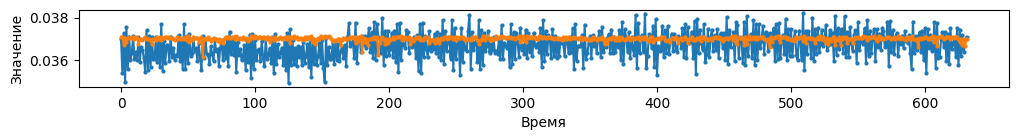

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


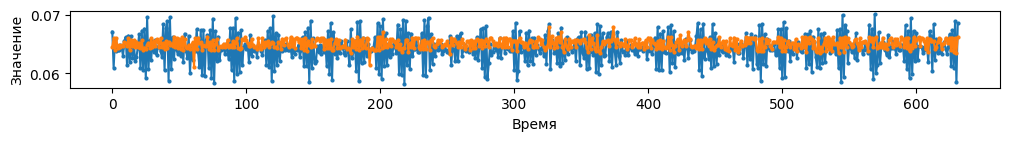

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


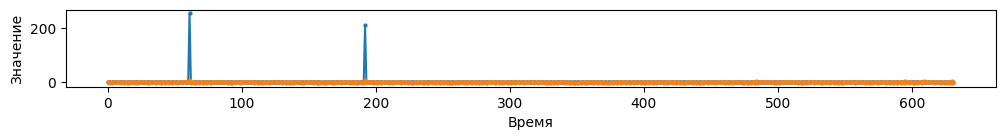

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


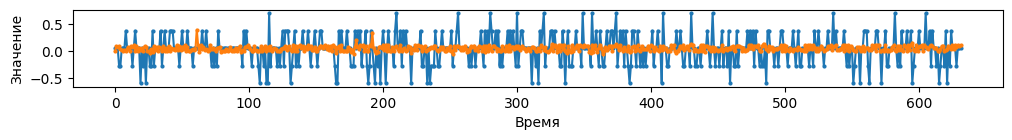

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


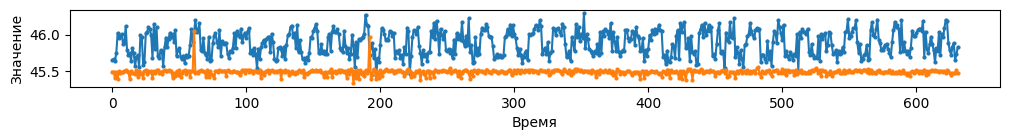

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


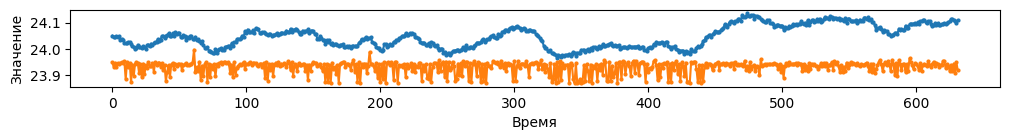

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


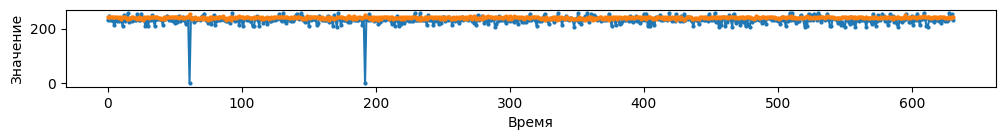

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


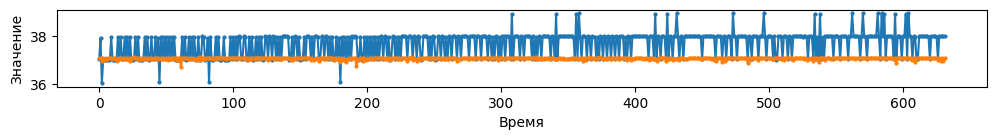

In [ ]:
for i in range(val_sc.shape[1]):
    plt.figure(figsize=(12,1))
    plt.plot(StSc.inverse_transform(val_sc)[:, i], marker='o', markersize=2)
    plt.plot(StSc.inverse_transform(model.predict(val_sc))[:, i], marker='o', markersize=2)
    plt.xlabel('Время')
    plt.ylabel('Значение')
    plt.show()

Средняя абсолютная ошибка:

$\text{mae} = \frac{1}{N} \sum^{N}_{i=1}|x_i - \hat{x}_i|$,  
где $N$ - общее число значений, $x_i$ - правдивое значение в момент времени $i$, $\hat{x}_i$ - предсказанное значение в момент времени $i$.

In [ ]:
mean_absolute_error(val_sc, model.predict(val_sc))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.8601434731494302

### Параметры, которые будем подбирать

In [ ]:
# Выбор сетки параметров для обучения и тестирования
n1=[16, 8, 4]  # Количество нейронов в первом слое
n2=[8, 4, 2]   # Количество нейронов во втором слое
n3=[4, 2, 1]   # Количество нейронов в третьем слое (бутылочное горлышко)
lr=[0.01, 0.001, 0.0001]  # Скорость обучения
batch_size=[32, 64, 128]  # Размер пакета

# Создание списка всех комбинаций параметров
parameters = product(n1, n2, n3, lr, batch_size)
parameters_list = list(parameters)

# Вывод общего количества комбинаций параметров
print(f'Total number of parameter combinations: {len(parameters_list)}')

Total number of parameter combinations: 243


In [ ]:
# Таблица с сеткой параметров
pd.DataFrame(parameters_list, columns=['neurons 1st layer',
                                      'neurons 2nd layer',
                                      'neurons 3rd layer',
                                      'learning rate',
                                      'batch size']).head()

,neurons 1st layer,neurons 2nd layer,neurons 3rd layer,learning rate,batch size
0,16,8,4,0.010,32
1,16,8,4,0.010,64
2,16,8,4,0.010,128
3,16,8,4,0.001,32
4,16,8,4,0.001,64


### Результаты подбора модели

In [ ]:
import ipywidgets
from tqdm.notebook import tqdm

In [ ]:
# Цикл для перебора всех комбинаций параметров
errors = []
for params in tqdm(parameters_list):
    model = arch(params, train_sc)  # Обучение модели с текущими параметрами
    val_pred = model.predict(val_sc, batch_size=params[4])  # Прогноз на валидационной выборке
    val_error = mean_absolute_error(val_sc, val_pred)  # Расчет MAE на валидационной выборке
    errors.append(list(params) + [val_error])  # Сохранение результатов

# Создание DataFrame для хранения результатов
df_errors = pd.DataFrame(errors, columns=['neurons 1st layer', 'neurons 2nd layer',
                                         'neurons 3rd layer', 'learning rate',
                                         'batch size', 'mae val'])

# Сортировка результатов по MAE на валидационной выборке
best_params = parameters_list[df_errors.sort_values('mae val').index[0]]

  0%|          | 0/243 [00:00<?, ?it/s]

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━

### Обучение лучшей модели на тренировочной и валидационной выборке

In [ ]:
model = arch(best_params, train_sc)  # Обучение модели с лучшими параметрами
model.summary()  # Вывод информации о модели

Model: "functional_244"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_244 (InputLayer)         │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1464 (Dense)                   │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_976              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_976 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1465 (Dense)                   │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_977              │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_977 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1466 (Dense)                   │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1467 (Dense)                   │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_978              │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_978 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1468 (Dense)                   │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_979              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_979 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1469 (Dense)                   │ (None, 8)                   │             136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,294 (8.96 KB)

 Trainable params: 732 (2.86 KB)

 Non-trainable params: 96 (384.00 B)

 Optimizer params: 1,466 (5.73 KB)

In [ ]:
# #прогноз и ошибка лучшей модели на обучающей выборке
# train_pred = model.predict(train_df_sc, batch_size=30)
# print('train mae: ', mean_absolute_error(train_df_sc,train_pred))

# #прогноз и ошибка лучшей модели на тестовой выборке
# test_pred = model.predict(test_df_sc, batch_size=30)
# print('test mae: ', mean_absolute_error(test_df_sc,test_pred))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


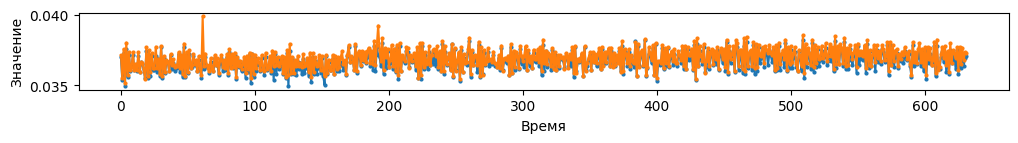

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


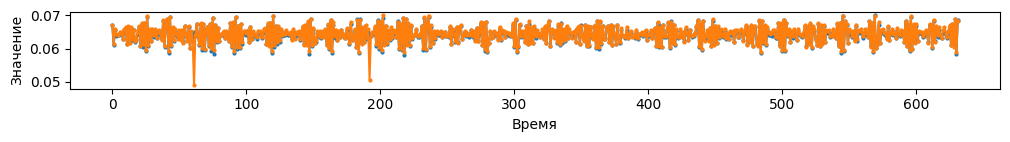

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


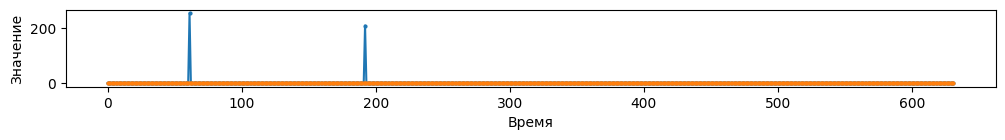

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


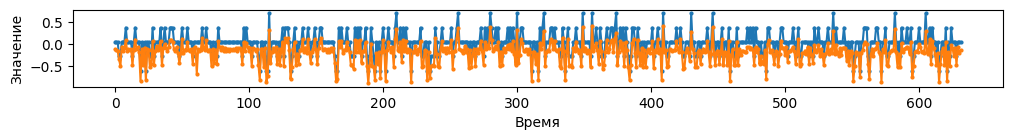

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


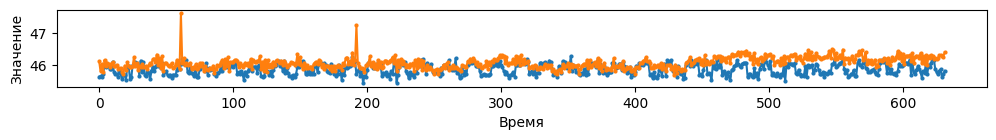

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


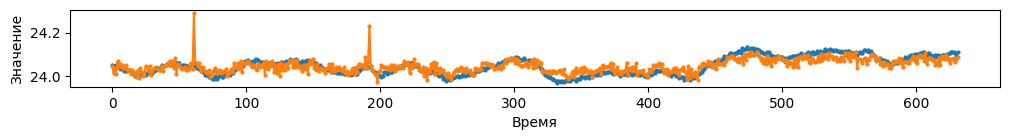

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


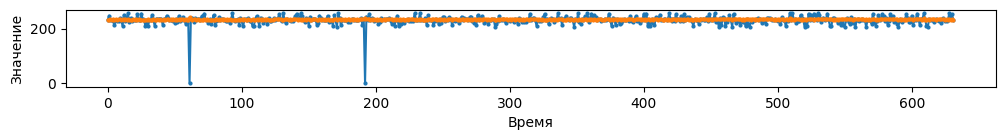

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


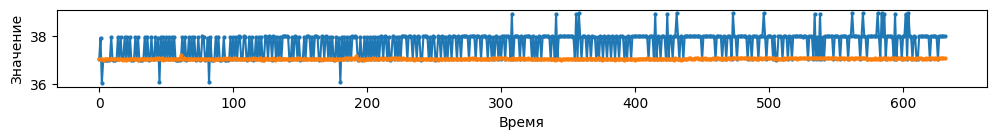

In [ ]:
for i in range(val_sc.shape[1]):
    plt.figure(figsize=(12,1))
    plt.plot(StSc.inverse_transform(val_sc)[:, i], marker='o', markersize=2)
    plt.plot(StSc.inverse_transform(model.predict(val_sc))[:, i], marker='o', markersize=2)
    plt.xlabel('Время')
    plt.ylabel('Значение')
    plt.show()

## 5. Построение индекса технического состояния (ИТС) на обученной модели

Построим разности сигналов и прогнозов модели в каждой точке:

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


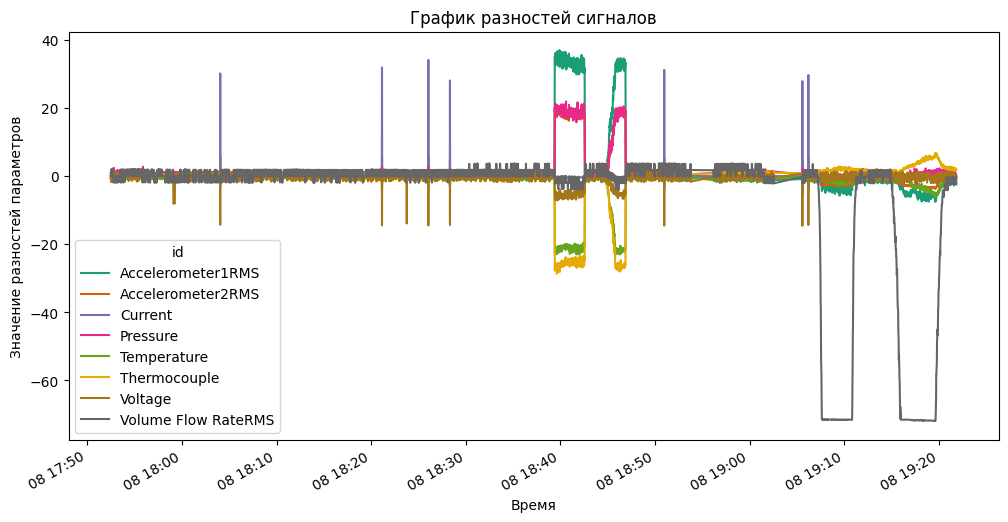

In [ ]:
test_residuals = data_sc - model.predict(data_sc)

pd.DataFrame(test_residuals, columns=data.columns, index = data.index).plot(figsize=(12,6), cmap='Dark2')
plt.xlabel('Время')
plt.ylabel('Значение разностей параметров')
plt.title('График разностей сигналов')
plt.show()

In [ ]:
train_residuals = train_sc - model.predict(train_sc)
val_residuals = val_sc - model.predict(val_sc)

UCL = pd.DataFrame(val_residuals).abs().sum(axis=1).quantile(0.99)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
# можем повысить контрольный предел из-за деградации оборудования для снижения кол-ва ложных тревог
UCL = 2 * UCL

print(f'Значение контрольного предела (UCL) = {UCL.round(2)}')

Значение контрольного предела (UCL) = 13.55


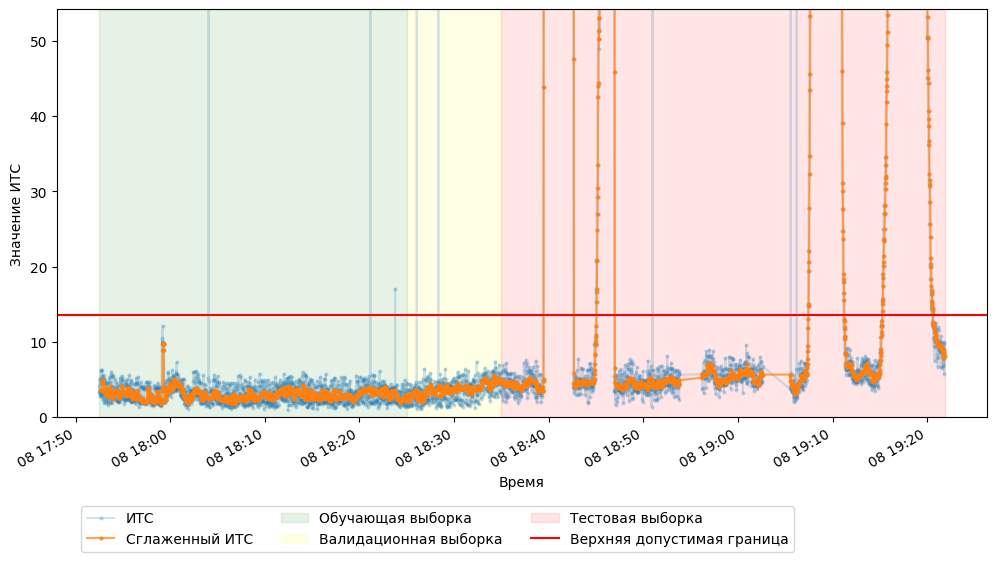

In [ ]:
# ИТС
pd.DataFrame(test_residuals, index=data.index).abs().sum(axis=1).plot(marker='o',
                                                                      markersize=2,
                                                                      alpha=0.2,
                                                                      figsize=(12,6),
                                                                      label='ИТС')
# ИТС с медианным фильтром с окном в 3 точки
pd.DataFrame(test_residuals, index=data.index).abs().sum(axis=1).rolling(11).median().plot(marker='o',
                                                                                          markersize=2,
                                                                                          alpha=0.7,
                                                                                          figsize=(12,6),
                                                                                          label='Сглаженный ИТС')

plt.axvspan(data.index[0],
            '2019-07-08 18:25',
            color='green',
            alpha=0.1,
            label='Обучающая выборка')
plt.axvspan('2019-07-08 18:25',
            '2019-07-08 18:35',
            color='yellow',
            alpha=0.1,
            label='Валидационная выборка')
plt.axvspan('2019-07-08 18:35',
            data.index[-1],
            color='red',
            alpha=0.1,
            label='Тестовая выборка')

plt.axhline(UCL, color='r', label='Верхняя допустимая граница')
plt.ylim([0, 4*UCL])
plt.xlabel('Время')
plt.ylabel('Значение ИТС')
plt.legend(bbox_to_anchor =(0.8, -0.2), ncol = 3)
plt.show()

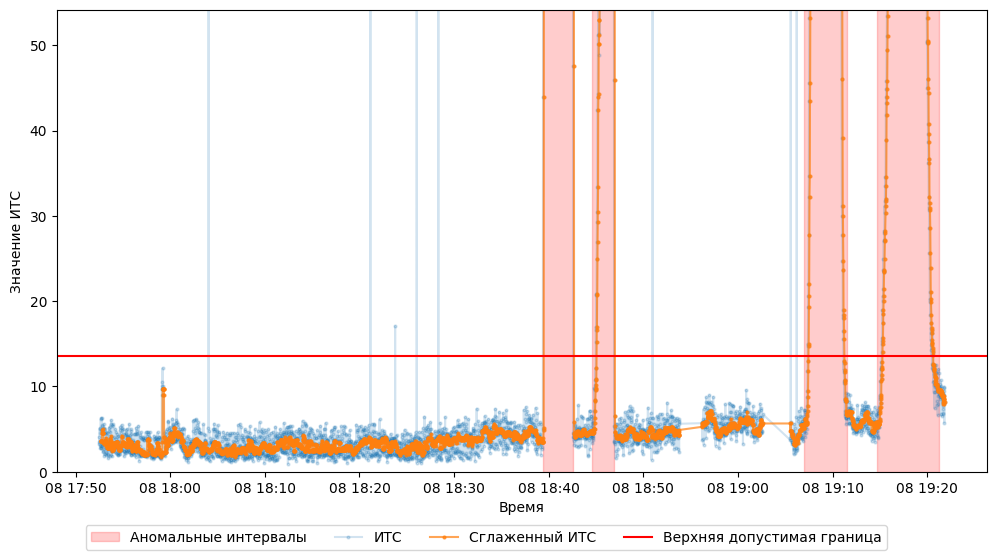

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.axvspan(
    data.index[data.index=='2019-07-08 18:39:22'][0],
    data.index[data.index=='2019-07-08 18:42:32'][0],
    alpha=0.2,
    color='red')
ax.axvspan(
    data.index[data.index=='2019-07-08 18:44:36'][0],
    data.index[data.index=='2019-07-08 18:46:51'][0],
    alpha=0.2,
    color='red')
ax.axvspan(
    data.index[data.index=='2019-07-08 19:06:57'][0],
    data.index[data.index=='2019-07-08 19:11:31'][0],
    alpha=0.2,
    color='red')
ax.axvspan(
    data.index[data.index=='2019-07-08 19:14:40'][0],
    data.index[data.index=='2019-07-08 19:21:16'][0],
    alpha=0.2,
    color='red', label='Аномальные интервалы')
ax.plot(data.index,
        pd.DataFrame(test_residuals).abs().sum(axis=1),
        marker='o',
        markersize=2,
        alpha=0.2,
        label='ИТС')
ax.plot(data.index,
        pd.DataFrame(test_residuals).abs().sum(axis=1).rolling(11).median(),
        marker='o',
        markersize=2,
        alpha=0.7,
        label='Сглаженный ИТС')
ax.axhline(UCL, color='r', label='Верхняя допустимая граница')
ax.set_ylim([0, 4*UCL])
ax.set_xlabel('Время')
ax.set_ylabel('Значение ИТС')
plt.legend(bbox_to_anchor =(0.9, -0.1), ncol = 4)
plt.show()

Среднее время запаздывания обнаружения

$\text{ADD} = \frac{1}{|Y|}\sum_{y \in Y} ( \tau_y - \theta_y )$,

где $|Y|$ - суммарное количество точек изменения состояния,  
$\tau_y$ - время обнаружения  
$\theta_y$ - время реального изменения состояния

### Вклад компонент в моменты аномалий (важность признаков)

In [ ]:
def feature_importance(residuals, analysis_type="collective", date_from=None, date_till=None, weigh=True):
    """
    Оценка вклада компонент в каждый момент времени/на интервале

    Parameters
    ----------
    residuals : pandas.DataFrame()
        Данные о разностях (невязках) модели между предсказанным и реальным значениями в формате DataFrame,
        где индексы - время, столбцы - названия признаков.

    analysis_type : str, "single"/"collective", "single" by default
        Поточечный: для каждого момента времени оценить вклад компонент
        интервальный: для интервала оценить вклад компонент, результат в каждым момент времени нормируется

    date_from : str в формате 'yyyy-mm-dd HH:MM:SS', None by default
        Дата и время, начиная с которого оценить вклад

    date_till : str в формате 'yyyy-mm-dd HH:MM:SS', None by default
        Дата и время, заканчивая которым оценить вклад

    weigh : boolean, True by default
        Взвешивать ли вклад в каждый момент времени на значение отклонения в данный момент времени.
        Только для analysis_type == "collective".

    Returns
    -------
    data : pandas.DataFrame().
        На выходе получаем DataFrame, где приведены результаты (вклад) либо для каждого момента времени,
        либо суммарный результат на интервале в ПРОЦЕНТАХ.
    """
    if date_from is None:
        start = 0
    if date_till is None:
        end = -1
    data = residuals[date_from:date_till].abs().copy()

    if (analysis_type == "collective") & (weigh == False):
        data = data.div(data.sum(axis=1), axis=0) * 100
        return pd.DataFrame(data.mean(), columns=['Важность признаков, %']).T
    elif (analysis_type == "collective") & (weigh == True):
        data = data.mean().div(data.mean().sum(), axis=0) * 100
        return pd.DataFrame(data, columns=['Важность признаков, %']).T
    elif analysis_type == "single":
        return data.div(data.sum(axis=1), axis=0) * 100

In [ ]:
for dates in [['2019-07-08 18:39:22','2019-07-08 18:42:32'],
              ['2019-07-08 18:44:36','2019-07-08 18:46:51'],
              ['2019-07-08 19:06:57','2019-07-08 19:11:31'],
              ['2019-07-08 19:14:40','2019-07-08 19:21:16']]:
    print(f'Инцидент с {dates[0]} по {dates[1]}')
    display(feature_importance(pd.DataFrame(test_residuals,
                                            index=data.index,
                                            columns=data.columns),
                               date_from=dates[0],
                               date_till=dates[1]))
    print('\n')

Инцидент с 2019-07-08 18:39:22 по 2019-07-08 18:42:32


id,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
"Важность признаков, %",26.784021,14.532634,0.29538,15.171259,16.950052,20.390534,4.285453,1.590668




Инцидент с 2019-07-08 18:44:36 по 2019-07-08 18:46:51


id,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
"Важность признаков, %",26.226445,14.386335,0.292243,15.037146,17.333874,20.648255,4.280849,1.794852




Инцидент с 2019-07-08 19:06:57 по 2019-07-08 19:11:31


id,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
"Важность признаков, %",4.549667,3.095876,0.031106,1.101801,2.32168,2.779183,0.826951,85.293737




Инцидент с 2019-07-08 19:14:40 по 2019-07-08 19:21:16


id,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
"Важность признаков, %",6.539982,3.49392,0.046793,1.24269,4.277008,5.312486,0.933433,78.153688


## 6. Задание

### Обязательное (см. закомментированные блоки)
Улучшить качество модели (получить более низкую среднюю абсолютную ошибку на валидационной выборке).

### Дополнительное
Реализовать и посчитать метрику ADD для обнаруженных аномалий.

In [ ]:
def calculate_add(predicted_anomalies, actual_anomalies):
  """
  Рассчитывает метрику ADD.

  Args:
    predicted_anomalies: Список временных меток предсказанных аномалий.
    actual_anomalies: Список временных меток фактических аномалий.

  Returns:
    Значение метрики ADD.
  """
  delays = []
  for actual_time in actual_anomalies:
    # Находим ближайшую предсказанную аномалию после фактической
    predicted_time = next((t for t in predicted_anomalies if t >= actual_time), None)
    if predicted_time is not None:
      delay = (predicted_time - actual_time).total_seconds()
      delays.append(delay)

  # Рассчитываем среднее значение задержки
  add = np.mean(delays) if delays else 0
  return add

  # Получим временные метки, когда ИТС превышает UCL
predicted_anomalies = data.index[pd.DataFrame(test_residuals).abs().sum(axis=1).rolling(11).median() > UCL]

# Временные метки фактических аномалий
actual_anomalies = [
    pd.Timestamp('2019-07-08 18:39:22'),
    pd.Timestamp('2019-07-08 18:44:36'),
    pd.Timestamp('2019-07-08 19:06:57'),
    pd.Timestamp('2019-07-08 19:14:40')
]

add = calculate_add(predicted_anomalies, actual_anomalies)
print(f"ADD: {add}")

ADD: 25.75
